<div style="border:solid purple 2px; padding: 20px"> 

Привет Ростислав! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю и качественную доработку комментариев! Все моменты были исправлены, так что работу я принимаю. Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
! pip install phik

     |████████████████████████████████| 679 kB 1.7 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns

In [3]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')
data_all = [data1, data2, data3]

In [4]:
for data in data_all:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

В данном проекте мы работаем с данными одинаковой природы, а это значит, что большинство расчетов для регионов будут повторяться. Это отличная возможность потренироваться над оптимизацией кода. Например, вот здесь. Первичное знакомство с данными можно было реализовать в функции и вызывать эту функцию для каждого из датафреймов (в цикле в идеале)

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    Циклы добавил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Я бы все в одном цикле реализовал

In [5]:
for data in data_all:
    print(data.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [6]:
for data in data_all:
    print(data.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

А почему каждое действие только для одного датафрейма? Это же разные регионы...

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    В одном коде проверил все для себя, но сейчас исправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

И это правильно, ведь мы делаем расчеты для заказчика...

Пропусков и аномальных значений в данных не было обнаружено

In [7]:
for data in data_all:
    print(data.duplicated().sum())

0
0
0


In [8]:
for data in data_all:
    print(data['id'].duplicated().sum())

10
4
4


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Да, полных дубликатов нет, но я бы посмотрел по `id` все ли записи уникальные и относятся к разным скважинам, или есть какие-то артефакты...

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    Удалил одинаковые айди, но как по мне, учитывая их количество, они бы на результат не повлияли
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

И так и так можно, это нужно обсуждать с заказчиком

Полных дубликатов не нашлось, но нашлись одинаковые id, удалим их

In [9]:
for data in data_all:
    data.drop_duplicates(subset=['id'],inplace=True)

In [10]:
for data in data_all:
    data.drop(columns=['id'],inplace=True)

Так как мы будем обучать модель на линейной регрессии, то для нее масштабирование признаков не обязательно, поэтому мы сразу приступим к разделу данных на выборки

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Возможно стоило посмотреть еще на корреляции признаков, потому что мультиколлинеарность негативно влияет на качество моделей. А построение диаграмм рассеяния позволит виявить нелинейные связи

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    Ниже все расписал
</div>

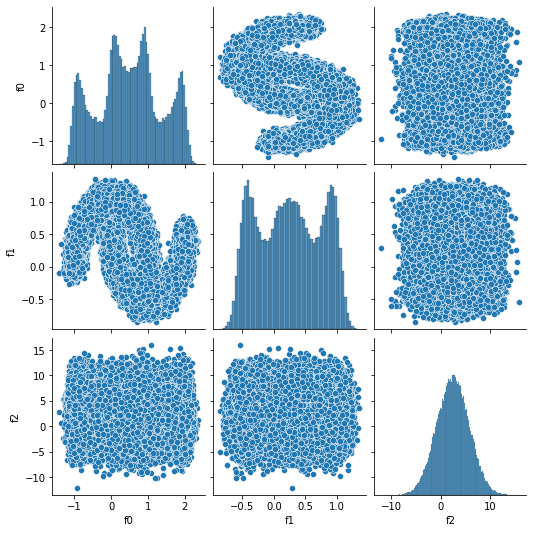

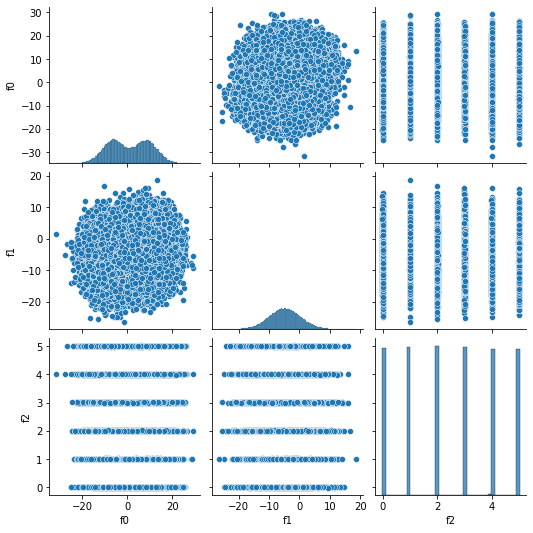

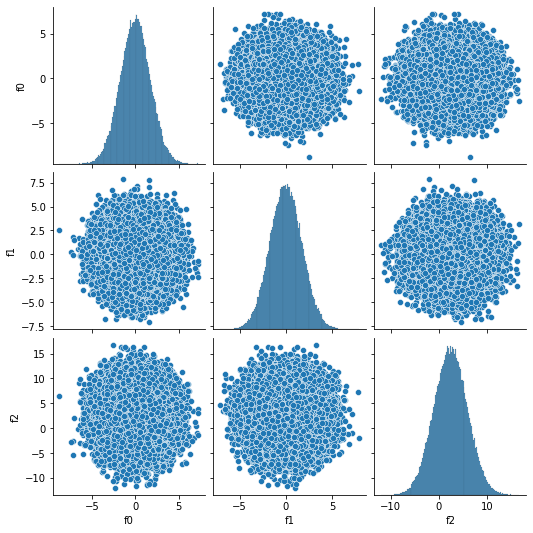

In [11]:
for data in data_all:
    data = data.drop(columns=['product'])
    sns.pairplot(data)

Видим, что признаки везде распределены симметрично, кроме признака f2 во втором регионе. Может это особенность региона, но просто удалять признак тоже нецелесообразно. Обучению модели это не помешает, так что просто его оставим, но желательно было бы узнать, почему этот признак распределен дискретно. 

Также видим странную зависимость 1 и 2 признака в первом регионе. Проверим какие будут коффициенты корреляции.

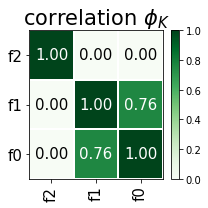

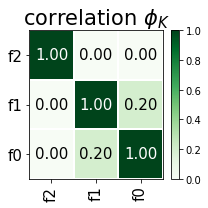

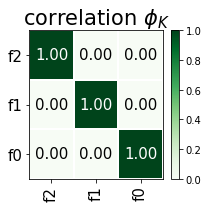

In [12]:
interval_cols = ['f0', 'f1', 'f2']
for data in data_all:
    data = data.drop(columns=['product'])
    phik_overview = data.phik_matrix(interval_cols=interval_cols)
    plot_correlation_matrix(phik_overview.values, 
                            x_labels=phik_overview.columns, 
                            y_labels=phik_overview.index, 
                            vmin=0, vmax=1, color_map="Greens", 
                            title=r"correlation $\phi_K$", 
                            fontsize_factor=1.5, 
                            figsize=(3, 3))
    plt.tight_layout()

Наблюдается довольно высокая корреляция 1 и 2 признаков в первом регионе, значит для обучения модели приедется удалить один из них.
удалим признак F0.

In [13]:
data1.drop(columns='f0', inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

В первой итерации я бы проводил анализ на данных, которые передал заказчик. При этом четко бы обозначил свои вопросы и сомнения. Сейчас получается не совсем честный тест, в одном регионе ты признак удаляешь, а в других нет. В подобных расчетах, где вся работа направлена на сравнение, важна однородность эксперимента 

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

А еще, я бы построил графики распределений признаков - много полезной информации можно получить

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    выше
    
</div>

## Обучение и проверка модели

In [14]:
state = np.random.RandomState(12345)
data_all = [data1, data2, data3]
result = []
predicted_reg = []

for data in data_all:
    features = data.drop(columns=['product'])
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)
    #print(features_train.shape)
    #print(features_valid.shape)
    #print(target_train.shape)
    #print(target_valid.shape) проверка на размеры выборок
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    
    data_predicted_target = pd.DataFrame(data = {'predicted': predicted, 'target': target_valid})
    predicted_reg.append(data_predicted_target)
    mean_predicted = predicted.mean()
    rmse = mean_squared_error(target_valid, predicted) ** 0.5
    result.append([mean_predicted, rmse])
result = pd.DataFrame(result, index=['data1', 'data2', 'data3'], columns=['mean_predicted', 'rmse'])
#predicted_reg #был создан список датафреймов, где хранятся значения предсказаний и таргетов
result

,mean_predicted,rmse
data1,92.783688,37.967962
data2,68.957466,0.894780
data3,95.079497,40.041557


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

У метрики mse есть встроенная возможность сразу считать rmse. Вот [здесь](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python) про это пишут

Видим, что у первого и третьего региона самые большие средние значения объемов, но rmse значительно больше чем у второго региона. Следовательно продолжаем исследование, так как по этим показателям пока рано судить

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Это не разброс, а метрика

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    
По сути эта метрика и показывает, насколько сильно у нас различаются (разбрасываются) данные от реального, но исправил
</div>

## Подготовка к расчёту прибыли

In [15]:
BUDGET = 10000000 #бюджет на разработку в тыс.руб.

In [16]:
INCOME = 450 #доход с единицы объема скважина в тыс.руб.

In [17]:
NUMBER = 200 #количество скважин, которые берут в разработку

In [18]:
EXPLOR = 500 #количество скважин, которые замеряют в процессе разведки

In [19]:
MIN_VOL = BUDGET / (INCOME * NUMBER) # мин. объем каждой скважины, для безубыточной разработки скважин в регионе
MIN_VOL

111.11111111111111

In [20]:
result['volume_dif'] = result['mean_predicted'] - MIN_VOL
result

,mean_predicted,rmse,volume_dif
data1,92.783688,37.967962,-18.327423
data2,68.957466,0.894780,-42.153646
data3,95.079497,40.041557,-16.031614


Видим, что если мы возьмем 200 средних по объему скважин в каждом регионе, то каждый регион в среднем будет сильно убыточным

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Так и есть, это может говорить о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача

## Расчёт прибыли и рисков 

Поэтому мы выберем 200 скважин с самым максимальным значением предсказанного объема и рассчитаем прибыль по каждому региону

In [26]:
def calc_profit(predicted, target, count):
    predicted_indexes = predicted.sort_values(ascending=False)[:count].index.unique()
#     print(predicted_indexes)
    sum_vol = target.loc[predicted_indexes].sum()
    profit = (sum_vol * INCOME) - BUDGET
    return profit

for df in predicted_reg:
    print(calc_profit(df['predicted'], df['target'], NUMBER))

3326522.534887461
2415086.6966815125
2458130.0963556226



<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Смотри, здесь небольшая опечатка. Из-за того, что ты определешь параметр `replace=True` при выборе выборки, у тебя появлются дубликаты строк, как в прогнозных данных, так и в реальных, и это нормально. Потом ты сортируешь прогнозы, берешь эти индексы и применяешь к фактическим данным, где могут быть дубликаты. И по итогу ты получаешь выборку, больше чем 200 значений, соответственно, риск будет при этом занижен, ведь прибыль мы считаем, учитывая расходы на разработку именно 200 скважин, меньшего числа. Нужно с этим разобраться...

P.S. параметр `replace=True` определен верно

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    
Причем я смотрел вебинар, где Никита Сон на это намекал... И когда начинал делать проект, уже понимал о чем идет речь, но потом про это вообще забыл и не учел этот момент.
    Исправил
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Бывает) Главное сейчас все правильно

Если выбирать 200 скважин из того объема данных, который нам предоставлен, то самым прибыльным регионом будет первый. 

Но в реальности, при разветке каждого региона замеры берут примерно из 500 точек, поэтому вероятность попадания в эту выборку  всех самых прибыльных скважин стремится к нулю. Поэтому нам надо провести 1000 случайных экспериментов на основе большого массива данных, откуда соберем по 500 объектов и посчитаем среднюю прибыль для каждого эксперимента. Тем самым у нас получиться распределение средней прибыли по каждому региону, которые мы после проанализируем

In [27]:
for df in predicted_reg:
    values = []
    predicted = df['predicted']
    target = df['target']
    for i in range(1000):
        predicted_subsample = predicted.sample(n=EXPLOR, replace=True, random_state=state)
        target_subsample = target[predicted_subsample.index]
        values.append(calc_profit(predicted_subsample, target_subsample, NUMBER))
    values = pd.Series(values)
    risk = (values < 0).mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    print('Средняя прибыль:', round(mean), '; Дов. инт.:', round(lower),',', round(upper), '; Риск убытков:', round(risk*100, 1), '%')

Средняя прибыль: 362202 ; Дов. инт.: -141047 , 831350 ; Риск убытков: 9.2 %
Средняя прибыль: 442363 ; Дов. инт.: 58848 , 849428 ; Риск убытков: 1.2 %
Средняя прибыль: 445635 ; Дов. инт.: -74886 , 928599 ; Риск убытков: 4.9 %


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Хорошо бы кол-во точек, используемых при разведке (500) и кол-во лучших (200) также вынести в константы. Это позволит быстро проводить расчеты при различных параметрах и избавит от монотонных исправлений

<div class="alert alert-block alert-info">
<b>Исправление: </b> 
    Согласен, сделано! Только странно, что ты это прям в красный комментарий загнал)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Если остальных красных комментариев не было бы, то и этот я бы покрасил оранжевым)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Расчет рисков можно было выполнить проще, без использования отдельных счетчиков, например, так 
    
```python
risk = (values < 0).mean()
```

Первичные расчеты продемонстрировали, что по средним значениям объема добычи 2 регион имел самый низкий показатель, но после расчета прибыли и рисков при помощи бутстрапа, мы видим обратную картину. Во первых, средняя прибыль во втором регионе незначительно ниже, чем у первого, но разброс доверительного интервала в разы отличается от первого региона. Это значит, что вероятность получить среднюю прибыль во втором регионе намного выше, чем у первого. Также самый маленький процент риска убытков показывает опять второй регион. Следовательно самым перспективным регионом для разработки новых месторождений будет регион номер 2.

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Библиотека os <a class="tocSkip"> </h3>

Модуль os в Python — это библиотека функций для работы с операционной системой. Методы, включенные в неё позволяют определять тип операционной системы, получать доступ к переменным окружения, управлять директориями и файлами:

- проверка существования объекта по заданному пути;
- определение размера в байтах;
- удаление;
- переименование и др.

Библиотека довольно обширная, при желании, можно почитать [официальную документацию](https://docs.python.org/3/library/os.html), либо короткий [перевод](https://pythonworld.ru/moduli/modul-os.html). Вот некоторые методы этой библиотеки

Чтобы узнать, какая она на вашей операционной системе, используется функция `getcwd`

![](https://i.ibb.co/4RYXGqV/image.png)

Функция `chdir` сменит ее на другую, которая будет указана аргументом

![](https://i.ibb.co/rwM0WY8/image.png)

Функция `listdir` без указания аргумента покажет все файлы и папки текущей рабочей директории. Можно также указать аргументом интересующий вас путь

![](https://i.ibb.co/4pWQ16Y/image.png)

Чтобы создать папку, применяется функция `mkdir`. Эта функция сможет создать только одну папку в существующем пути, если указанного пути не существует, то вызовется ошибка. Если папка уже существует - вызовется ошибка

![](https://i.ibb.co/q53Z6YD/image.png)

<div class="alert alert-block alert-info">
<b>Комментарий: </b> 
    Спасибо)
</div>

## Общий вывод:
На этапе предобработки данных были выполнены следующие шаги:
1. Произведен поиск ошибок в данных, такик как: пропуски, дубликаты, неккоректные названия столбцов, аномальные значения. Ошибки были только в дубликатах id, но их было мало, поэтому просто от них избавились;
2. Проведена проверка на мультиколлиниарность и найдены сильнокоррелирующие признаки в первом регионе, поэтому избавились от одного;
3. Странное распределение (дискретное) признака было обнаружено во втором регионе в третьем признаке, но на обучение это не должно повлиять, потому оставили его как есть (нужно выявить характер такой аномалии);
4. Выборку разделили на обучающую и валидационную в соотношении 3:1;
5. Принято решение не масштабировать признаки, так как модель обучали методом линейной регрессии.

На этапе обучения и проверки модели было выявлено:
1. У первого и третьего региона самые большие средние значения объемов, но разброс данных значительно больше чем у второго региона;
2. Не стоит производить оценку прибыльности регионов на основе полученных данных, так как не был принят во внимание эффект случайности.

На этапе предварительного расчета прибыльности регионов было определено:
1. Если мы возьмем 200 средних по объему скважин в каждом регионе, то каждый регион в среднем будет сильно убыточным.

На этапе расчета прибыли и рисков:
1. Было выбрано 200 скважин с самым максимальным значением предсказанного объема и рассчитана прибыль по каждому региону, где самым прибыльным регионом стал первый со значением 3.32 млрд.руб.;
2. Принято решение провести 1000 случайных экспериментов на основе большого массива данных, откуда собрано по 500 объектов и посчитана средняя прибыль для каждого эксперимента;
3. Проанализированы результаты расчетов и было выявлено, что самым оптимальным регионом для инвестиций является регион номер 2, так как риск убыточности у него самый малый (1.6%), средняя прибыль равна 0.44 млрд. и разброс средних значений прибыли намного меньше, чем в остальных регионах (при доверительном интервале 95%:нижняя граница 0.06 млрд, верхняя граница 0.84 млрд.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован